<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/TMS_nb/17lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
print(clf.named_steps['linearsvc'].intercept_)
print(clf.predict([[0, 0, 0, 0]]))

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [ ]:
# print data(feature)shape
cancer.data.shape

(569, 30)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9649122807017544


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

models = {}
for i in range(1, 100):
  models[i] = Ridge(alpha=1)
  models[i].fit(X_train[:-i, :], y_train[:-i])
  print(f"Step: {i}")
  print(mean_squared_error(models[i].predict(X_test), y_test))

Step: 1
0.055959042835537556
Step: 2
0.05584923519766454
Step: 3
0.05596052307975981
Step: 4
0.055380878232372276
Step: 5
0.05527156781172459
Step: 6
0.05567626127467214
Step: 7
0.0553181800742351
Step: 8
0.05493836166340592
Step: 9
0.05490467085791164
Step: 10
0.05532876180906956
Step: 11
0.05527399087423489
Step: 12
0.054930319671275415
Step: 13
0.05484283306894864
Step: 14
0.05551796639594838
Step: 15
0.05563038317470405
Step: 16
0.05613164660419563
Step: 17
0.056113600873686845
Step: 18
0.05613973909997439
Step: 19
0.05661655515609325
Step: 20
0.056402804204151544
Step: 21
0.05586537688167602
Step: 22
0.05591543568498477
Step: 23
0.05570132879901382
Step: 24
0.05653359628500691
Step: 25
0.05589250611785198
Step: 26
0.056041087710983296
Step: 27
0.05568685508351586
Step: 28
0.055844242011935476
Step: 29
0.05680954788320114
Step: 30
0.056444657777046874
Step: 31
0.05574831153570252
Step: 32
0.05550203038172507
Step: 33
0.05543629193567616
Step: 34
0.054940387136328914
Step: 35
0.0550

[ 0.24371831 -0.13071247  0.01218592]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


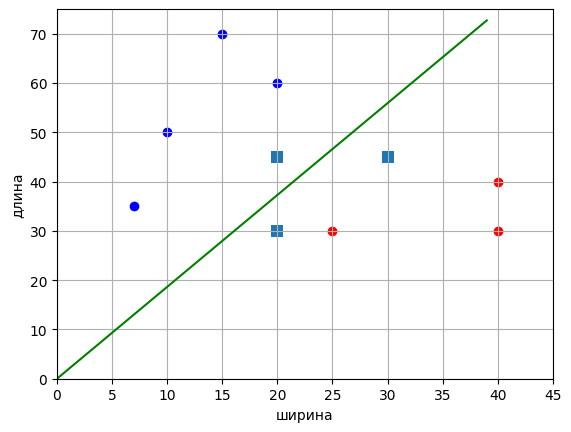

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = svm.SVC(kernel='linear')      # SVM с линейным ядром
clf.fit(x_train, y_train)           # нахождение вектора w по обучающей выборке

lin_clf = svm.LinearSVC()           # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train)       # нахождение вектора w по обучающей выборке

v = clf.support_vectors_            # выделение опорных векторов
w = lin_clf.coef_[0]                # коэффициенты линейной модели
print(w, v, sep='\n')


# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)

[-2  2  0  0  0  0  0  0  0  0  0  0]
[[30. 10.  1.]
 [20. 60.  1.]
 [20. 45.  1.]
 [ 7. 35.  1.]
 [15. 50.  1.]
 [20. 30.  1.]
 [25. 30.  1.]
 [30. 45.  1.]]


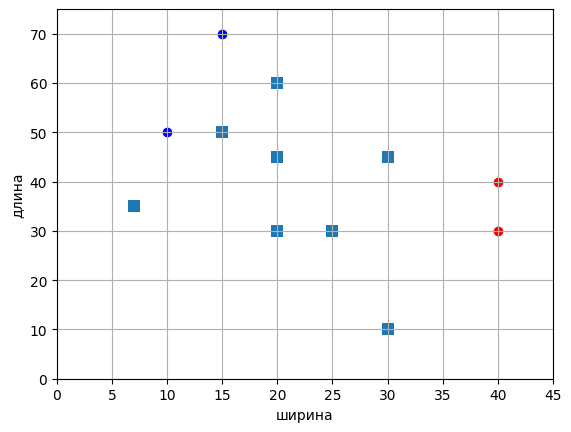

In [ ]:
x_train = [[30, 10], [15, 50], [10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
y_train = [-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1]

clf = svm.SVC(kernel='linear')  # SVM с линейным ядром
clf.fit(x_train, y_train)  # нахождение вектора w по обучающей выборке
y_pr = clf.predict(x_train)  # проверка на обучающей выборке
print(np.array(y_train) - np.array(y_pr))  # нули - без ошибок; иначе - ошибка

v = clf.support_vectors_  # выделение опорных векторов
print(v)

# формирование графиков для визуализации полученных результатов
x_train = np.array(x_train)
y_train = np.array(y_train)

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor=None, linewidths=0, marker='s')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()